In [34]:
# https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

In [35]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from random import *
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [36]:
    br = '\n'
    # upload files

    df = np.load('data/df.npy')
    df_features = np.load('data/features.npy')
    dfv = pd.DataFrame(df, columns=df_features)
    print(dfv.head())
    dfv['Member_Status'].unique()
    df_temp = dfv[dfv['Member_Status'] == 'ACTIVE'].copy()
    # select the columns from above data
#     li = ['Length_Of_Residence', 'Home_Owner', 'Age','Children','Education',\
#           'Dwelling_Type','Credit_Ranges','Member_Tenure_Years','New_Mover_Flag','Total_Products']

    li = ['_service_cnt', '_total_cost']
    df1= df_temp[li].copy()
    df2 = df1.dropna()
    subdf = df2.drop_duplicates()
    print("subset df shape:", subdf.shape, " orignal df shape:", df.shape )
    def yes_or_no(x):
        if x > 0:
            return 1
        elif x == 0:
            return 0
        else:
            return np.NaN 
    # data_X
    select_col = li[:-1]
    print(select_col)
    print("--"*50)
    y_col = li[-1]
    print("target y:", y_col)

    #split the dataset to X & y:
    X = subdf.drop([y_col], axis=1).values
    #fix_y = subdf[y_col].apply(yes_or_no)
    fix_y = subdf[y_col].copy()
    print("max y:", fix_y.max())
    y = fix_y.values
    print("y is", y)

    # data_X contains only X
    data_X = subdf[select_col].copy()
    print(data_X.head())

    # columns numbers only 
#     data_X['Member_Tenure_Years'].astype(int)
#     cat_vars = ['Home_Owner', 'Children', 'Education', 'Dwelling_Type', 'Credit_Ranges', 'New_Mover_Flag']
#     print("selected columns:", cat_vars)
#     data_new = pd.get_dummies(data_X, columns=cat_vars)
#     data_new.columns
    #print("features: \n", list(data_new))
#     X = data_new
    X = data_X
    y = y
    print(X.shape, y.shape)
    print("--"*50)
    attributes = list(data_X)
#     print("X attributes: \n", attributes)
#     print("--"*50)
#     print(X.head())


  Household_Key Individual_Key      City State_Grouped  ZIP5      ZIP9  \
0           875         717785  CRANSTON            RI  2921  29211601   
1           969          19943  JOHNSTON            RI  2919  29191023   
2          8718         199385  CRANSTON            RI  2910  29103407   
3         11524       52285851  JOHNSTON            RI  2919  29195073   
4         13422      170834500  COVENTRY            RI  2816  28167758   

  FSV_CMSI_Flag FSV_Credit_Card_Flag FSV_Deposit_Program_Flag  \
0             0                    0                        0   
1             0                    0                        0   
2             0                    0                        0   
3             0                    0                        0   
4             0                    0                        0   

  FSV_Home_Equity_Flag           ...           _memeber_count _service_cnt  \
0                    0           ...                        3            9   
1       

In [37]:
subdf.columns

Index(['_service_cnt', '_total_cost'], dtype='object')

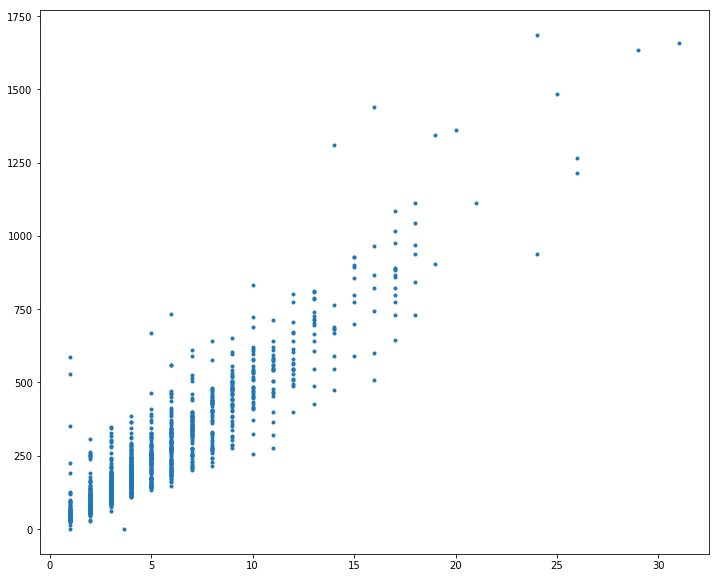

In [38]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
# x = np.array([i*np.pi/180 for i in range(60,300,4)])
# np.random.seed(10)  #Setting seed for reproducibility
# y = np.sin(x) + np.random.normal(0,0.15,len(x))
x = subdf['_service_cnt']
y = subdf['_total_cost']
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
#print(data)

plt.plot(data['x'],data['y'],'.')

In [39]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

    x       y x_2     x_3     x_4     x_5     x_6     x_7     x_8     x_9  \
0   9 5.6e+02  81 7.3e+02 6.6e+03 5.9e+04 5.3e+05 4.8e+06 4.3e+07 3.9e+08   
1   3 2.3e+02   9      27      81 2.4e+02 7.3e+02 2.2e+03 6.6e+03   2e+04   
2 3.6       0  13      49 1.8e+02 6.5e+02 2.4e+03 8.6e+03 3.1e+04 1.1e+05   
3   3 1.2e+02   9      27      81 2.4e+02 7.3e+02 2.2e+03 6.6e+03   2e+04   
4   1      34   1       1       1       1       1       1       1       1   

     x_10    x_11    x_12    x_13    x_14    x_15  
0 3.5e+09 3.1e+10 2.8e+11 2.5e+12 2.3e+13 2.1e+14  
1 5.9e+04 1.8e+05 5.3e+05 1.6e+06 4.8e+06 1.4e+07  
2 4.2e+05 1.5e+06 5.6e+06   2e+07 7.4e+07 2.7e+08  
3 5.9e+04 1.8e+05 5.3e+05 1.6e+06 4.8e+06 1.4e+07  
4       1       1       1       1       1       1  


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.114495e-19
  overwrite_a=True).T


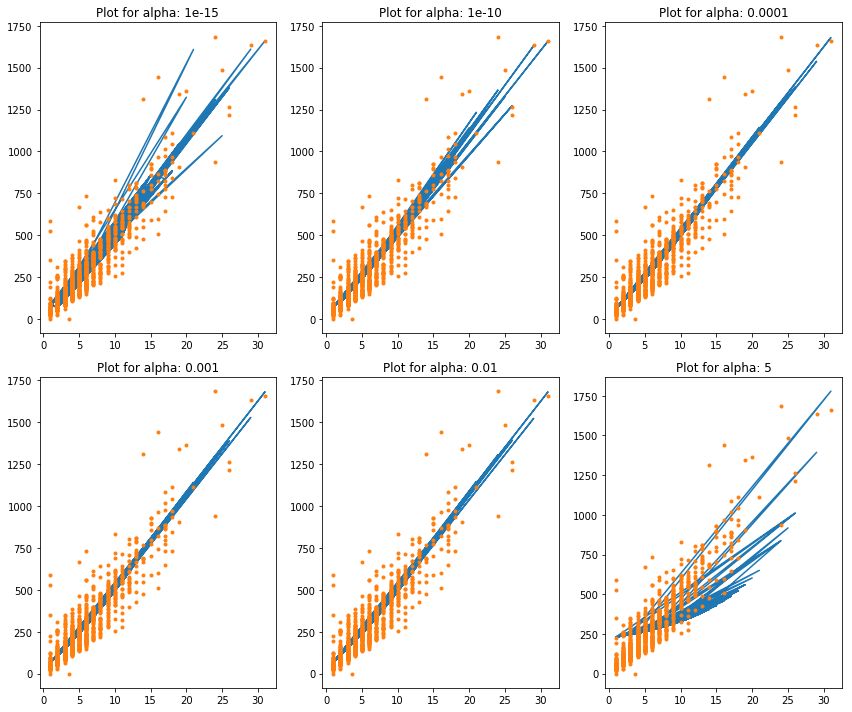

In [40]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [41]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,8.9e+06,1.7e+03,-3.6e+03,2.9e+03,-1.1e+03,2.4e+02,-27,0.93,0.17,-0.029,0.0023,-0.00011,3.6e-06,-8.1e-08,1.3e-09,-1.3e-11,6.3e-14
alpha_1e-10,7.8e+06,77,-24,26,-4.6,0.37,-0.0092,-0.00029,4.8e-06,5.9e-07,9.6e-09,-5.2e-10,-3e-11,-3.3e-13,2.9e-14,1.3e-15,-3.7e-17
alpha_1e-08,7.8e+06,54,6.6,13,-2.2,0.2,-0.0071,-9.3e-05,7.3e-06,2.2e-07,-2.5e-09,-3.2e-10,-8.4e-12,6e-14,1.3e-14,3.7e-16,-1.4e-17
alpha_0.0001,7.8e+06,27,38,1.1,-0.027,0.00044,3.1e-05,6.4e-09,-3.8e-08,-1.6e-09,-3.5e-11,6.6e-14,4.1e-14,2e-15,5.7e-17,2.8e-19,-8.5e-20
alpha_0.001,7.8e+06,27,38,0.8,0.0036,-6.8e-05,-4.4e-06,-2.5e-07,-1e-08,-2.8e-10,-4.5e-12,5e-14,7.2e-15,3.3e-16,9.6e-18,1.2e-19,-7.2e-21
alpha_0.01,7.8e+06,33,37,0.82,0.0081,-0.00011,-8.1e-06,-2.8e-07,-7.5e-09,-1.7e-10,-2.8e-12,-9.8e-15,1.9e-15,1.2e-16,4.7e-18,1.6e-19,4.8e-21
alpha_1,1.4e+07,1.5e+02,16,0.59,0.016,0.00033,5.7e-06,7.5e-08,2.5e-10,-3.5e-11,-1.9e-12,-7.8e-14,-2.8e-15,-9.5e-17,-3.1e-18,-1e-19,-3.2e-21
alpha_5,2.8e+07,2.2e+02,6.5,0.27,0.0085,0.00023,5.6e-06,1.4e-07,3.3e-09,8.2e-11,2e-12,5.1e-14,1.3e-15,3.1e-17,7.3e-19,1.7e-20,3.5e-22
alpha_10,3.6e+07,2.5e+02,3.9,0.17,0.0056,0.00016,4.2e-06,1.1e-07,3.1e-09,8.5e-11,2.4e-12,6.9e-14,2e-15,5.8e-17,1.7e-18,5.1e-20,1.5e-21
alpha_20,4.2e+07,2.6e+02,2.2,0.096,0.0034,0.0001,2.9e-06,8.1e-08,2.3e-09,6.9e-11,2e-12,6.1e-14,1.9e-15,5.6e-17,1.7e-18,5.3e-20,1.6e-21


In [42]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64